# DATA 620 - Assignment 5

Jeremy OBrien, Mael Illien, Vanita Thompson

* Choose a corpus of interest. 
* How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way). 
* Taking the most common words, how many unique words represent half of the total words in the corpus
* Identify the 200 highest frequency words in this corpus. 
* Create a graph that shows the relative frequency of these 200 words. 
* Does the observed relative frequency of these words follow Zipf’s law? Explain.  
* In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”  



## Setup

In [2]:
import pandas as pd
import nltk, re, pprint
import matplotlib.pyplot as plt
from nltk import word_tokenize
from nltk.corpus import stopwords

## Data Import

We start by importing a corpora built into NLTK and taking a look at the data. Note that the raw text contains the entire book, including title, author and introductions. We will remove those sections to limit our analysis to the actual content of the book.

In [3]:
path = nltk.data.find('corpora/gutenberg/melville-moby_dick.txt')
raw = open(path, 'r').read()

In [4]:
raw_text = raw[21467:] # Ignore prologue pages
raw_text[:100]

'Call me Ishmael.  Some years ago--never mind how long\nprecisely--having little or no money in my pur'

## Data Exploration and Analysis

We break down the raw text into tokens and filter out the punctuation in order to get the actual words.

In [7]:
tokens = word_tokenize(raw_text)
text = nltk.Text(tokens)
print('The text contains {} tokens.'.format(len(tokens)))

The text contains 250419 tokens.


In [8]:
tokens[:10]

['Call', 'me', 'Ishmael', '.', 'Some', 'years', 'ago', '--', 'never', 'mind']

In [9]:
# Extract only the words and set convert every word to lower case
word_tokens = [w.lower() for w in tokens if w.isalpha()] 
print('There are {} word tokens. '.format(len(word_tokens)))

There are 206813 word tokens. 


In [10]:
word_tokens[:10]

['call',
 'me',
 'ishmael',
 'some',
 'years',
 'ago',
 'never',
 'mind',
 'how',
 'long']

### Unique words

To find the unique words, we can turn the list of words into a set in order to use the property that sets have no repeated elements. We resctrict our definition of unique words to words that have the unique spelling, which includes plurals.

In [11]:
# Unique words
vocab = sorted(set(word_tokens))
print('There are {} unique words.'.format(len(vocab)))

There are 16270 unique words.


### Frequency distribution

The NLTK function FreqDist returns the most common words in the corpus along with the number of occurences. Not surprisingly, the most common words below are short words like articles which are ubiquitous to english. These words do not hold any special value and are often discarded.

In [13]:
fdist = nltk.FreqDist(word_tokens)
most_common = fdist.most_common(200)
most_common[:10]

[('the', 14167),
 ('of', 6446),
 ('and', 6309),
 ('a', 4604),
 ('to', 4511),
 ('in', 4069),
 ('that', 3041),
 ('his', 2495),
 ('it', 2483),
 ('i', 2100)]

### Zipf's Law

Zipf's law states that given a large sample of words used, the frequency of any word is inversely proportional to its rank in the frequency table. Word number n has a frequency proportional to 1/n.

The plot below shows the weighted frequencies of the words in the Moby Dick text. We can observe that the frequency decreases in an inverse relationship as predicted by Zipf's law (red line). The word 'of' is about half as frequent as 'the'.

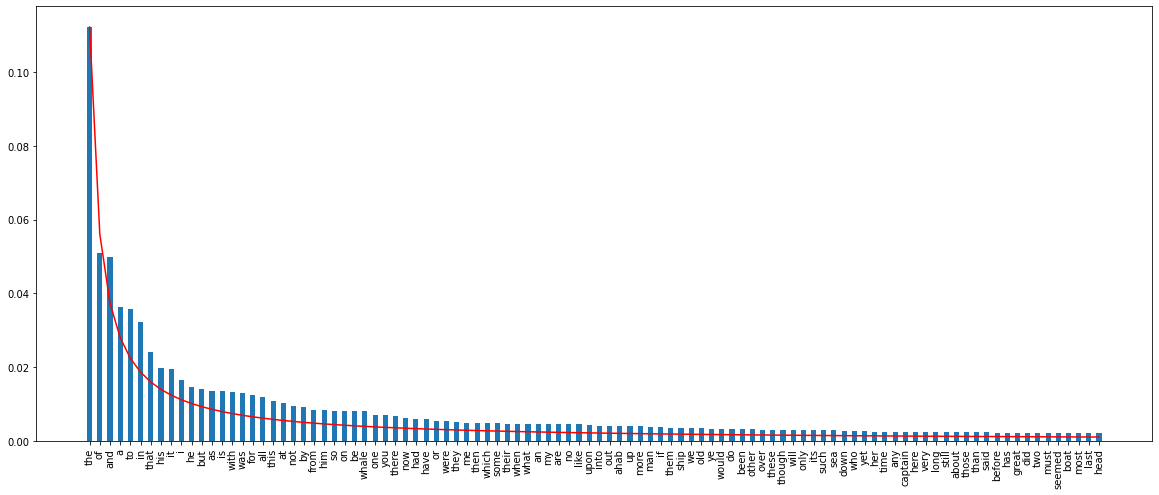

In [15]:
plt.rcParams["figure.figsize"] = (16,8)
wrds = [w[0] for w in most_common]
freq = [w[1] for w in most_common]
weights = [f/sum(freq) for f in freq]
zipf = [weights[0]/n for n in range(1,200)]

plt.rcParams["figure.figsize"] = (20,8)
plt.bar(wrds[:100], weights[:100], width=0.5)
plt.plot(zipf[:100], color='r')
plt.xticks(rotation=90)
plt.show()

### Particularities of the corpus

We remove common words "stop words" in order to look at the words that are particular to this text. What we observe is that the frequency of these words differ from other corpora as this distribution appears to be related to the sea and a nautical theme, which makes sense given the title of the book. In the top 20 we find wale, sea, ship and captain.

In [19]:
stop_words = stopwords.words('english')
filtered_words = [w for w in word_tokens if not w in stop_words]
fdist_filtered = nltk.FreqDist(filtered_words)
most_common_filtered = fdist_filtered.most_common(200)
#most_common_filtered[:20]

In [20]:
unzip = [[ i for i, j in most_common_filtered ], 
       [ j for i, j in most_common_filtered ]] 
common_words_df = pd.DataFrame({'word': unzip[0], 'frequency': unzip[1]})
common_words_df[:20]

,word,frequency
0,whale,1018
1,one,898
2,like,572
3,upon,560
4,ahab,508
5,man,488
6,ship,458
7,old,439
8,ye,433
9,would,429


## Youtube